In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sqlite3
import sqlalchemy
import math

In [2]:
df = pd.read_csv("winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
#Cut out columns:repetitive index,designation and various region_2 
short_df= df.reindex(columns=["country","description","designation","points", "price", "province", "region_1","variety","winery"])
short_df.head(1)

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz


In [4]:
df1= pd.read_csv("winemag-data-130k-v2.csv")
df1.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [5]:
#Cut out columns:repetitive index,designation and various region_2 
short_df1= df1.reindex(columns=["country","description","designation", "points", "price", "province", "region_1","variety","winery"])
short_df1.head(1)

,country,description,designation,points,price,province,region_1,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,White Blend,Nicosia


In [6]:
df2= pd.read_json("winemag-data-130k-v2.json")
df2.head(1)
#print(len(df2))

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [7]:
#dropped taster info...do we need title? redundant?
short_df2= df2.reindex(columns=["country","description","designation","points", "price", "province", "region_1","title","variety","winery"])
#short_df2.head(1)
short_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
country        129908 non-null object
description    129971 non-null object
designation    92506 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
title          129971 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [8]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 9 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [9]:
short_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
country        129908 non-null object
description    129971 non-null object
designation    92506 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [10]:
#drop nulls and repeats
short_df2=short_df2.dropna()
short_df= short_df.dropna()
short_df1=short_df1.dropna()

In [11]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77284 entries, 0 to 150928
Data columns (total 9 columns):
country        77284 non-null object
description    77284 non-null object
designation    77284 non-null object
points         77284 non-null int64
price          77284 non-null float64
province       77284 non-null object
region_1       77284 non-null object
variety        77284 non-null object
winery         77284 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 5.9+ MB


In [12]:
short_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 3 to 129970
Data columns (total 9 columns):
country        70175 non-null object
description    70175 non-null object
designation    70175 non-null object
points         70175 non-null int64
price          70175 non-null float64
province       70175 non-null object
region_1       70175 non-null object
variety        70175 non-null object
winery         70175 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 5.4+ MB


In [13]:
short_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 3 to 129970
Data columns (total 10 columns):
country        70175 non-null object
description    70175 non-null object
designation    70175 non-null object
points         70175 non-null int64
price          70175 non-null float64
province       70175 non-null object
region_1       70175 non-null object
title          70175 non-null object
variety        70175 non-null object
winery         70175 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 5.9+ MB


In [14]:
# df = df3.merge(df1, on='place_id', how='left').merge(df2, on='user_id', how='left')
# print (df)
firstmerge_df = pd.merge(short_df, short_df1, how="outer")
firstmerge_df.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [15]:
firstmerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122797 entries, 0 to 122796
Data columns (total 9 columns):
country        122797 non-null object
description    122797 non-null object
designation    122797 non-null object
points         122797 non-null int64
price          122797 non-null float64
province       122797 non-null object
region_1       122797 non-null object
variety        122797 non-null object
winery         122797 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 9.4+ MB


In [16]:
firstmerge_df= firstmerge_df.drop_duplicates(subset=None, keep='first', inplace=False)
firstmerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89790 entries, 0 to 122796
Data columns (total 9 columns):
country        89790 non-null object
description    89790 non-null object
designation    89790 non-null object
points         89790 non-null int64
price          89790 non-null float64
province       89790 non-null object
region_1       89790 non-null object
variety        89790 non-null object
winery         89790 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 6.9+ MB


In [17]:
secmerge_df= pd.merge(firstmerge_df, short_df2, how="outer")
secmerge_df.head(50)


,country,description,designation,points,price,province,region_1,variety,winery,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,NaN
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Tinta de Toro,Numanthia,NaN
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,Tinta de Toro,Maurodos,NaN
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,NaN
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,Bergström,NaN
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Pinot Noir,Blue Farm,NaN


In [18]:
secmerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95199 entries, 0 to 95198
Data columns (total 10 columns):
country        95199 non-null object
description    95199 non-null object
designation    95199 non-null object
points         95199 non-null int64
price          95199 non-null float64
province       95199 non-null object
region_1       95199 non-null object
variety        95199 non-null object
winery         95199 non-null object
title          70175 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 8.0+ MB


In [19]:
secmerge_df=secmerge_df.drop_duplicates(subset=None, keep='first', inplace=False)
secmerge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89791 entries, 0 to 95198
Data columns (total 10 columns):
country        89791 non-null object
description    89791 non-null object
designation    89791 non-null object
points         89791 non-null int64
price          89791 non-null float64
province       89791 non-null object
region_1       89791 non-null object
variety        89791 non-null object
winery         89791 non-null object
title          64767 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [20]:
#Additional Transformation
#Was thinking we could get the point avg by country and/or by variety
country = secmerge_df[["country","points", "price","variety"]]


In [21]:
country.head()

,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
1,Spain,96,110.0,Tinta de Toro
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
4,France,95,66.0,Provence red blend


# Need additional trans
country_avg= country.mean().sort_values("points", axis = 0, ascending = False, 
                 inplace = True)
country_avg.head()

In [22]:
#Reviews WordCloud
#text = secmerge_df.description[0]
dxns = secmerge_df.description.str.split(' ')
rw = [ word for desc in dxns for word in desc]
rw4 = [ w for w in rw if len(w) > 4]
rwSerie = pd.Series(rw4)
rwCounts = rwSerie.value_counts()
top20 = rwCounts[:20]#testing for 1 review




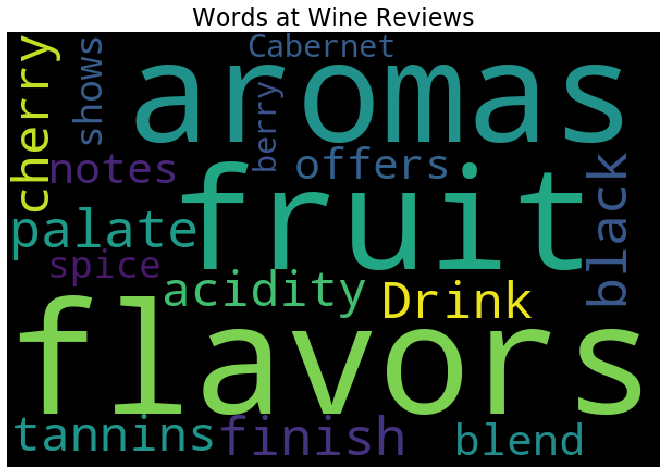

In [23]:
##Simple WC
#create WC
# wordcloud= WordCloud().generate(text)
# #display
# plt.imshow(wordcloud, interpolation= 'bilinear')
# plt.axis("off")
# plt.show()
#wordcloud.to_file()

#Glorious WC 
words = ''
for w in top20.index:
    for i in range(top20.loc[w] // 5000):
        words = words + w + ' '

plt.figure(figsize=(12,8))
wc = WordCloud(background_color='black', max_font_size=200,
                            width=600,
                            height=400,
                            max_words=20,
                            relative_scaling=.2).generate(words)
plt.imshow(wc)
plt.title("Words at Wine Reviews", fontsize=24)
plt.axis("off");